<h1> DATA PRE-PROCESSING </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("adult.csv")
df.head()

age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [5]:
df.duplicated().sum()

24

In [6]:
df = df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
for i in df.columns:
    a = df.value_counts(i)
    print(f'values of {a}\n\n')

values of age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
86      1
87      1
Length: 73, dtype: int64


values of workclass
 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
dtype: int64


values of fnlwgt
203488     13
164190     13
123011     13
126675     12
148995     12
           ..
158752      1
158762      1
158776      1
158784      1
1484705     1
Length: 21648, dtype: int64


values of education
 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Pres

In [9]:
df.replace(' ?',np.nan, inplace = True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

<h3> Mode Imputation </h3>

In [10]:
df.fillna(df["native_country"].mode()[0], inplace = True) 

<h3> Proportional Imputation </h3>

In [11]:
value_counts1 = df['workclass'].value_counts(normalize=True)
cumulative_probs1 = value_counts1.cumsum()

proportional_values1 = np.random.rand(len(df))
df['workclass'].fillna(pd.Series(np.searchsorted(cumulative_probs1, proportional_values1), index=df.index).map(value_counts1), inplace=True)

In [12]:
value_counts2 = df['occupation'].value_counts(normalize=True)
cumulative_probs2 = value_counts2.cumsum()

proportional_values2 = np.random.rand(len(df))
df['occupation'].fillna(pd.Series(np.searchsorted(cumulative_probs2, proportional_values2), index=df.index).map(value_counts2), inplace=True)

In [13]:
df.head(50)

age          workclass  fnlwgt      education  education_num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acdm             12   
14   40            Private  121772      Assoc-voc             11   
15   34            Private  245487        7th-8th              4   
16   25   Self-emp-not-inc  176756        HS-grad              9   
17   32            Private  186824        HS-grad              9   
18   38            Private   28887           11th              7   
19   43   Self-emp-not-inc  292175        Masters             14   
20   40            Private  193524      Doctorate             16   
21   54            Private  302146        HS-grad              9   
22   35        Federal-gov   76845            9th              5   
23   43            Private  117037           11th              7   
24   59            Private  109015        HS-grad              9   
25   56          Local-gov  216851      Bachelors             13   
26   19            Private  168294        HS-grad              9   
27   54      United-States  180211   Some-college             10   
28   39            Private  367260        HS-grad              9   
29   49            Private  193366        HS-grad              9   
30   23          Local-gov  190709     Assoc-acdm             12   
31   20            Private  266015   Some-college             10   
32   45            Private  386940      Bachelors             13   
33   30        Federal-gov   59951   Some-college             10   
34   22          State-gov  311512   Some-college             10   
35   48            Private  242406           11th              7   
36   21            Private  197200   Some-college             10   
37   19            Private  544091        HS-grad              9   
38   31            Private   84154   Some-college             10   
39   48   Self-emp-not-inc  265477     Assoc-acdm             12   
40   31            Private  507875            9th              5   
41   53   Self-emp-not-inc   88506      Bachelors             13   
42   24            Private  172987      Bachelors             13   
43   49            Private   94638        HS-grad              9   
44   25            Private  289980        HS-grad              9   
45   57        Federal-gov  337895      Bachelors             13   
46   53            Private  144361        HS-grad              9   
47   44            Private  128354        Masters             14   
48   41          State-gov  101603      Assoc-voc             11   
49   29            Private  271466      Assoc-voc             11   

            marital_status          occupation    relationship  \
0            Never-married        Adm-clerical   Not-in-family   
1       Married-civ-spouse     Exec-managerial         Husband   
2                 Divorced   Handlers-cleaners   Not-in-family   
3       Married-civ-spouse   Handlers-cleaners         Husband   
4       Married-civ-spouse      Prof-specialty            Wife   
5       Married-civ-spouse     Exec-managerial            Wife   
6    Married-spouse-absent       Other-service   Not-in-family   
7      

<h3> Test-Train Splits </h3>

In [14]:
import random
from sklearn.model_selection import train_test_split 

In [15]:
train_data = []
test_data = []
train_labels = []
test_labels = []

for i in range(0,10):
    x = df.loc[:, df.columns != "income"]
    y = df["income"].astype('str')

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = random.randint(20, 80))

    train_data.append(x_train)
    test_data.append(x_test)
    train_labels.append(y_train)
    test_labels.append(y_test)

print(train_data)
print(test_data)
print(train_labels)
print(test_labels)

[       age          workclass  fnlwgt      education  education_num  \
6670    19            Private   27433           11th              7   
6188    33            Private  195488        HS-grad              9   
16716   55   Self-emp-not-inc  248841        Masters             14   
456     30            Private  180374        HS-grad              9   
12302   37   Self-emp-not-inc  174308        HS-grad              9   
...    ...                ...     ...            ...            ...   
28424   18            Private  761006           11th              7   
22391   38            Private  331395        7th-8th              4   
10733   37            Private  208391   Some-college             10   
5244    58            Private  142182        HS-grad              9   
11685   51            Private   43354           11th              7   

            marital_status          occupation    relationship    race  \
6670         Never-married   Handlers-cleaners   Not-in-family   White  

<h1>  NAIVE BAYES CLASSIFIER IMPLEMENTATION </h1>

<h2> Calculating Prior Probability </h2>

In [16]:
all_class_priors = []

for i in range(0,10):
	y_train_df = pd.DataFrame(train_labels[i], columns=['income'])
	class_priors = {}
	for outcome in np.unique(y_train_df):
		outcome_count = sum(y_train_df['income'] == outcome)
		class_priors[outcome] = outcome_count / len(y_train_df)
	all_class_priors.append(class_priors)

all_class_priors

[{' <=50K': 0.7582696223443083, ' >50K': 0.24173037765569172},
 {' <=50K': 0.7583848784048561, ' >50K': 0.24161512159514387},
 {' <=50K': 0.7576549233547197, ' >50K': 0.24234507664528027},
 {' <=50K': 0.7588074839601983, ' >50K': 0.24119251603980177},
 {' <=50K': 0.7581543662837604, ' >50K': 0.24184563371623957},
 {' <=50K': 0.7604210688078682, ' >50K': 0.23957893119213186},
 {' <=50K': 0.758231203657459, ' >50K': 0.241768796342541},
 {' <=50K': 0.7581543662837604, ' >50K': 0.24184563371623957},
 {' <=50K': 0.7595758576971839, ' >50K': 0.24042414230281609},
 {' <=50K': 0.7589227400207461, ' >50K': 0.24107725997925392}]

<h2> Calculating Likelihoods </h2>

In [17]:
all_likelihoods = []

for i in range(0,10):
    y_train_df = pd.DataFrame(train_labels[i], columns=['income'])
    likelihoods = {}
    for feature in train_data[i]:
        likelihoods[feature] = {}
        for outcome in np.unique(y_train_df):
            outcome_count = sum(y_train_df["income"] == outcome)
            feature_likelihood = train_data[i][feature][y_train_df[y_train_df["income"] == outcome].index.values.tolist()].value_counts().to_dict()
            
            for feature_val, count in feature_likelihood.items():
                likelihoods[feature][str(feature_val) + ':' + outcome] = count/outcome_count
    all_likelihoods.append(likelihoods)

all_likelihoods

[{'age': {'23: <=50K': 0.03607437807164209,
   '25: <=50K': 0.03176774585803314,
   '20: <=50K': 0.0312104169833308,
   '24: <=50K': 0.031159750721994225,
   '22: <=50K': 0.030501089324618737,
   '27: <=50K': 0.030045092972589553,
   '28: <=50K': 0.02984242792724325,
   '26: <=50K': 0.02918376652986776,
   '31: <=50K': 0.02903176774585803,
   '21: <=50K': 0.028778436439175152,
   '19: <=50K': 0.028727770177838577,
   '30: <=50K': 0.02766377868977048,
   '29: <=50K': 0.0274104473830876,
   '33: <=50K': 0.02705578355373157,
   '35: <=50K': 0.026853118508385267,
   '34: <=50K': 0.026093124588336628,
   '36: <=50K': 0.025231798145614836,
   '32: <=50K': 0.024674469270912498,
   '38: <=50K': 0.02239448751076658,
   '37: <=50K': 0.022242488726756854,
   '39: <=50K': 0.021989157420073974,
   '42: <=50K': 0.021583827329381366,
   '18: <=50K': 0.02138116228403506,
   '40: <=50K': 0.020621168363986423,
   '41: <=50K': 0.020570502102649844,
   '43: <=50K': 0.020317170795966965,
   '46: <=50K': 0.

In [18]:
all_class_likelihoods = []

for i in range(0,10):
	y_train_df = pd.DataFrame(train_labels[i], columns=['income'])
	class_likelihoods = {}
	for feature in train_data[i]:
		class_likelihoods[feature] = {}
		if(feature != 'age' and feature != 'education_num' and feature != 'fnlwgt' and feature != 'capital_gain' and feature != 'capital_loss' and feature != 'hours_per_week'):
			continue
		for outcome in np.unique(y_train_df): 
			class_likelihoods[feature][outcome] = {}
			class_likelihoods[feature][outcome]['mean'] = train_data[i][feature][y_train_df[y_train_df["income"] == outcome].index.values.tolist()].mean()
			class_likelihoods[feature][outcome]['variance'] = train_data[i][feature][y_train_df[y_train_df["income"] == outcome].index.values.tolist()].var()
	all_class_likelihoods.append(class_likelihoods)
	
all_class_likelihoods

[{'age': {' <=50K': {'mean': 36.826620053706236,
    'variance': 197.64363061531125},
   ' >50K': {'mean': 44.21169739351558, 'variance': 109.47894119724006}},
  'workclass': {},
  'fnlwgt': {' <=50K': {'mean': 190467.22551552922,
    'variance': 11379920319.257864},
   ' >50K': {'mean': 187614.70502225048, 'variance': 10495811786.890879}},
  'education': {},
  'education_num': {' <=50K': {'mean': 9.601560520849166,
    'variance': 5.96253911309069},
   ' >50K': {'mean': 11.599809281627463, 'variance': 5.626501314757265}},
  'marital_status': {},
  'occupation': {},
  'relationship': {},
  'race': {},
  'sex': {},
  'capital_gain': {' <=50K': {'mean': 147.43167654658762,
    'variance': 1009844.2606463227},
   ' >50K': {'mean': 4141.766211061666, 'variance': 227605032.48181468}},
  'capital_loss': {' <=50K': {'mean': 53.108121801692256,
    'variance': 96592.25472578412},
   ' >50K': {'mean': 197.34472345835982, 'variance': 358432.295866288}},
  'hours_per_week': {' <=50K': {'mean': 38

In [19]:
all_keys_list = []

for i in range(0,10):
    keys_list = []
    for feature in train_data[i].columns:
        keys_list.append(all_likelihoods[i][feature].keys())
    all_keys_list.append(keys_list)
    
all_keys_list

[[dict_keys(['23: <=50K', '25: <=50K', '20: <=50K', '24: <=50K', '22: <=50K', '27: <=50K', '28: <=50K', '26: <=50K', '31: <=50K', '21: <=50K', '19: <=50K', '30: <=50K', '29: <=50K', '33: <=50K', '35: <=50K', '34: <=50K', '36: <=50K', '32: <=50K', '38: <=50K', '37: <=50K', '39: <=50K', '42: <=50K', '18: <=50K', '40: <=50K', '41: <=50K', '43: <=50K', '46: <=50K', '45: <=50K', '47: <=50K', '44: <=50K', '17: <=50K', '49: <=50K', '51: <=50K', '50: <=50K', '48: <=50K', '52: <=50K', '55: <=50K', '53: <=50K', '56: <=50K', '54: <=50K', '58: <=50K', '59: <=50K', '60: <=50K', '57: <=50K', '61: <=50K', '62: <=50K', '63: <=50K', '64: <=50K', '65: <=50K', '67: <=50K', '66: <=50K', '68: <=50K', '69: <=50K', '70: <=50K', '72: <=50K', '71: <=50K', '73: <=50K', '74: <=50K', '75: <=50K', '76: <=50K', '90: <=50K', '77: <=50K', '78: <=50K', '80: <=50K', '81: <=50K', '79: <=50K', '82: <=50K', '84: <=50K', '85: <=50K', '83: <=50K', '88: <=50K', '87: <=50K', '86: <=50K', '37: >50K', '47: >50K', '45: >50K', '4

<h2> Predict the Class of a given instance </h2>

In [20]:
all_results = []

for i in range(0,10):
	y_train_df = pd.DataFrame(train_labels[i], columns=['income'])
	results = []
	X = np.array(test_data[i])

	for query in X:
		probs_outcome = {}
		for outcome in np.unique(y_train_df):
			prior = all_class_priors[i][outcome]
			likelihood = 1
			evidence_temp = 1

			k = 0
			for feature, feature_value in zip(list(train_data[i].columns), query):
				if(feature == 'age' or feature == 'education_num' or feature == 'fnlwgt' or feature == 'capital_gain' or feature == 'capital_loss' or feature == 'hours_per_week'):
					mean = all_class_likelihoods[i][feature][outcome]['mean']
					var = all_class_likelihoods[i][feature][outcome]['variance']
					likelihood *= (1/math.sqrt(2*math.pi*var)) * np.exp(-(feature_value - mean)**2 / (2*var))
				else:
					if((str(feature_value) + ':' + outcome) in all_keys_list[i][k]):
						likelihood *= all_likelihoods[i][feature][str(feature_value) + ':' + outcome]
					else:
						likelihood *= 1

			k = k + 1
			posterior_numerator = (likelihood * prior)
			probs_outcome[outcome] = posterior_numerator

		result = max(probs_outcome, key = lambda x: probs_outcome[x])
		results.append(result)
	all_results.append(results)

all_results

[[' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  ' <=50K',
  ' >50K',
  ' <=50K',
  '

<h2> Calculating Accuracy </h2>

In [21]:
all_accuracy = []

for i in range(0,10):
    y_pred = pd.DataFrame(all_results[i], columns=['income'])
    y_test_df = pd.DataFrame(test_labels[i], columns=['income'])
    y_test_df.reset_index(inplace=True)

    accuracy = round(float(sum(y_pred['income'] == y_test_df['income']))/float(len(y_test_df)) * 100 ,2)
    print('Accuracy of Split {}: {}'.format(i+1, accuracy))
    
    all_accuracy.append(accuracy)

Accuracy of Split 1: 79.75
Accuracy of Split 2: 80.01
Accuracy of Split 3: 80.09
Accuracy of Split 4: 79.27
Accuracy of Split 5: 80.13
Accuracy of Split 6: 79.26
Accuracy of Split 7: 80.02
Accuracy of Split 8: 80.13
Accuracy of Split 9: 79.46
Accuracy of Split 10: 79.44


<h1> EVALUATION AND IMPROVEMENT </h1>

<h2> Calculating Performance Metrics </h2>

In [22]:
all_precision = []
all_recall = []
all_f1_score = []

for i in range(0,10):
    y_pred = pd.DataFrame(all_results[i], columns=['income'])
    y_test_df = pd.DataFrame(test_labels[i], columns=['income'])
    y_test_df.reset_index(inplace=True)

    tp = 0
    fp = 0
    fn = 0
        
    for j in range(len(y_test_df)):
        if y_test_df['income'].iloc[j] == " >50K" and y_pred['income'].iloc[j] == " >50K":
            tp += 1
        elif y_test_df['income'].iloc[j] == " <=50K" and y_pred['income'].iloc[j] == " >50K":
            fp += 1
        elif y_test_df['income'].iloc[j] == " >50K" and y_pred['income'].iloc[j] == " <=50K":
            fn += 1
        
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)

    print('Precision of Split {}: {}'.format(i+1, precision*100))
    print('Recall of Split {}: {}'.format(i+1, recall*100))
    print('F1 Score of Split {}: {}'.format(i+1, f1_score*100))
    print()
    all_precision.append(round(precision*100,2))
    all_recall.append(round(recall*100,2))
    all_f1_score.append(round(f1_score*100,2))

Precision of Split 1: 65.578231292517
Recall of Split 1: 31.157078215901745
F1 Score of Split 1: 42.24364592462752

Precision of Split 2: 67.17241379310344
Recall of Split 2: 31.41935483870968
F1 Score of Split 2: 42.81318681318682

Precision of Split 3: 66.11796982167353
Recall of Split 3: 31.48269105160026
F1 Score of Split 3: 42.65486725663716

Precision of Split 4: 64.24731182795699
Recall of Split 4: 30.62139654067905
F1 Score of Split 4: 41.475054229934926

Precision of Split 5: 67.02849389416554
Recall of Split 5: 31.994818652849744
F1 Score of Split 5: 43.31433581762385

Precision of Split 6: 65.9119496855346
Recall of Split 6: 32.68870867124142
F1 Score of Split 6: 43.70308590492077

Precision of Split 7: 67.93002915451895
Recall of Split 7: 30.142302716688228
F1 Score of Split 7: 41.7562724014337

Precision of Split 8: 67.02849389416554
Recall of Split 8: 31.994818652849744
F1 Score of Split 8: 43.31433581762385

Precision of Split 9: 67.13483146067416
Recall of Split 9: 30.2

<h3> Comparison between 10 splits </h3>

In [23]:
best_accuracy = max(all_accuracy)
best_accuracy

80.13

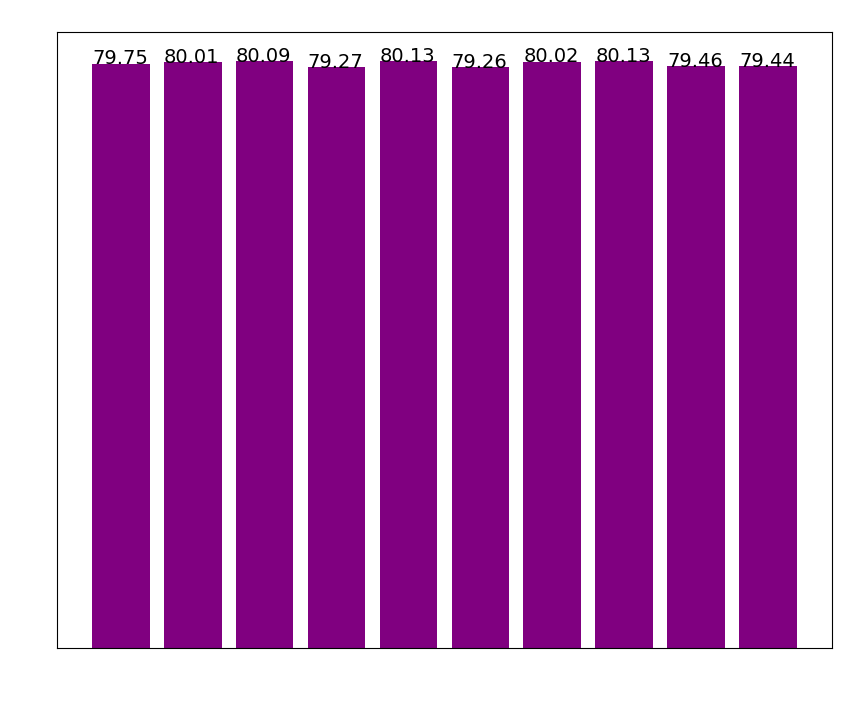

In [24]:
# Define the data
models = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5', 'Split 6', 'Split 7', 'Split 8', 'Split 9', 'Split 10']
accuracies = all_accuracy

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8)) 
bars = ax.bar(models, accuracies, color='purple')

# Set label and tick color to white
ax.tick_params(colors='white')
ax.set_title('Split Comparison', color='white')
ax.set_ylabel('Accuracy', color='white')
ax.set_xlabel('Models', color='white')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval, fontsize=14, color='black')

# Show the plot
plt.show()

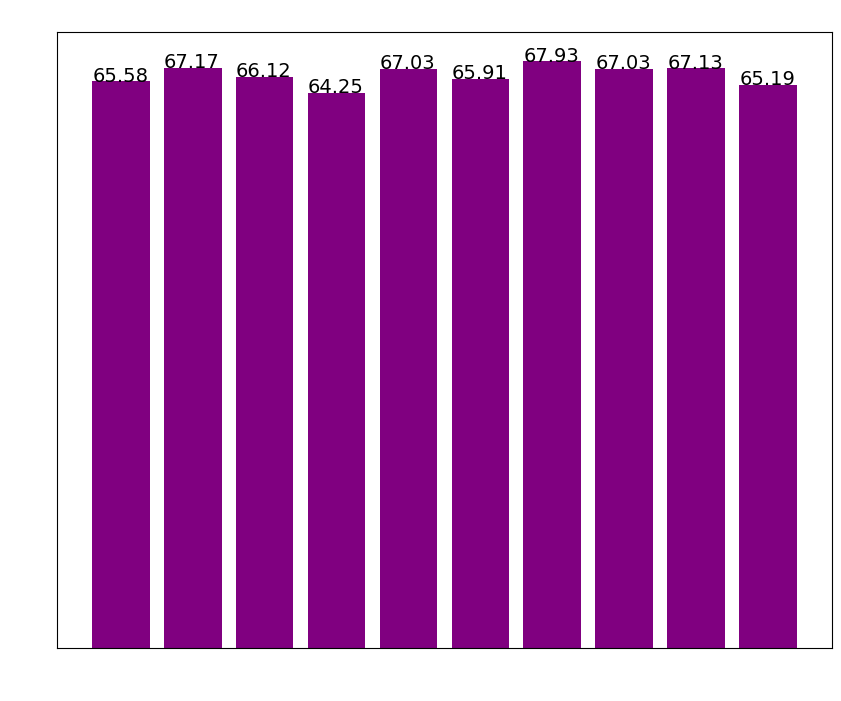

In [25]:
# Define the data
models = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5', 'Split 6', 'Split 7', 'Split 8', 'Split 9', 'Split 10']
precisions = all_precision

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8)) 
bars = ax.bar(models, precisions, color='purple')

# Set label and tick color to white
ax.tick_params(colors='white')
ax.set_title('Split Comparison', color='white')
ax.set_ylabel('Precision', color='white')
ax.set_xlabel('Models', color='white')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval, fontsize=14, color='black')

# Show the plot
plt.show()

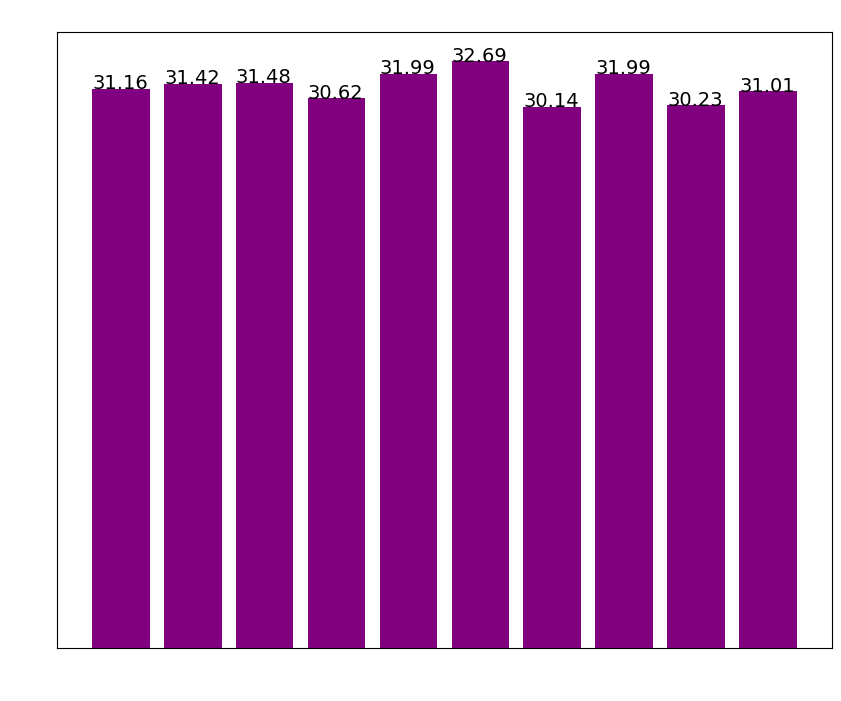

In [26]:
# Define the data
models = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5', 'Split 6', 'Split 7', 'Split 8', 'Split 9', 'Split 10']
recalls = all_recall

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8)) 
bars = ax.bar(models, recalls, color='purple')

# Set label and tick color to white
ax.tick_params(colors='white')
ax.set_title('Split Comparison', color='white')
ax.set_ylabel('Recall', color='white')
ax.set_xlabel('Models', color='white')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval, fontsize=14, color='black')

# Show the plot
plt.show()

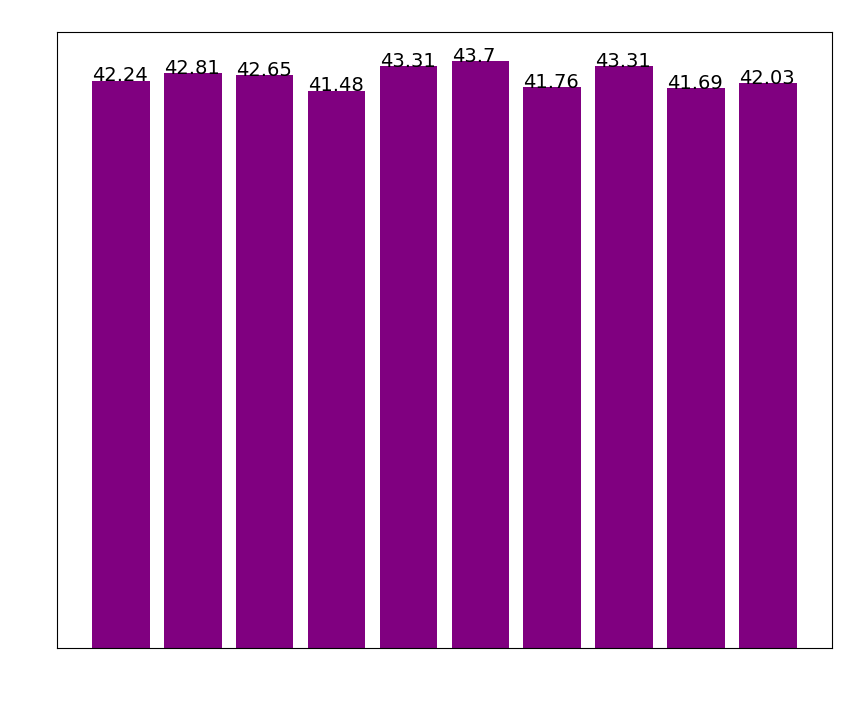

In [27]:
# Define the data
models = ['Split 1', 'Split 2', 'Split 3', 'Split 4', 'Split 5', 'Split 6', 'Split 7', 'Split 8', 'Split 9', 'Split 10']
f1_scores = all_f1_score

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8)) 
bars = ax.bar(models, f1_scores, color='purple')

# Set label and tick color to white
ax.tick_params(colors='white')
ax.set_title('Split Comparison', color='white')
ax.set_ylabel('F1 Score', color='white')
ax.set_xlabel('Models', color='white')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval, fontsize=14, color='black')

# Show the plot
plt.show()

<h2> Laplace Smoothing </h2>

In [28]:
all_N1 = []
all_N2 = []
smoothing_parameter = [1, 10, 100, 1000]
K = 14

for i in range(0,10):
    y_train_df = pd.DataFrame(train_labels[i], columns=['income'])
    N1 = sum(y_train_df['income'] == " <=50K")
    N2 = sum(y_train_df['income'] == " >50K")
    
    all_N1.append(N1)
    all_N2.append(N2)

In [29]:
all_smoothing_results = []

for i in range(0,10):
	y_train_df = pd.DataFrame(train_labels[i], columns=['income'])
	smoothing_results = []
	X = np.array(test_data[i])

	for param in smoothing_parameter:
		temp_results = []
		for query in X:
			probs_outcome = {}
			flag = 0
			for outcome in np.unique(y_train_df):
				prior = all_class_priors[i][outcome]
				likelihood = 1
				evidence_temp = 1

				k = 0
				for feature, feature_value in zip(list(train_data[i].columns), query):
					if(feature == 'age' or feature == 'education_num' or feature == 'fnlwgt' or feature == 'capital_gain' or feature == 'capital_loss' or feature == 'hours_per_week'):
						mean = all_class_likelihoods[i][feature][outcome]['mean']
						var = all_class_likelihoods[i][feature][outcome]['variance']
						likelihood *= (1/math.sqrt(2*math.pi*var)) * np.exp(-(feature_value - mean)**2 / (2*var))
					else:
						if((str(feature_value) + ':' + outcome) in all_keys_list[i][k]):
							likelihood *= all_likelihoods[i][feature][str(feature_value) + ':' + outcome]
						else:
							if(flag == 1):
								likelihood *= (param) / (all_N1[i] + param * K)
							elif(flag == 2):
								likelihood *= (param) / (all_N2[i] + param * K)

				flag = flag + 1
				k = k + 1
				posterior_numerator = (likelihood * prior)
				probs_outcome[outcome] = posterior_numerator

			result = max(probs_outcome, key = lambda x: probs_outcome[x])
			temp_results.append(result)
		smoothing_results.append(temp_results)
	all_smoothing_results.append(smoothing_results)

all_smoothing_results

[[[' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',
   ' <=50K',

In [30]:
all_accuracy_smoothing = []
i = 0
for smoothing_results in all_smoothing_results:
    accuracy_smoothing = []
    k = 0
    for temp_results in smoothing_results:
        y_test_df = pd.DataFrame(test_labels[i], columns=['income'])
        y_test_df.reset_index(inplace=True)
        y_smoothing_pred = pd.DataFrame(temp_results, columns=['income'])
        accuracy = round(float(sum(y_smoothing_pred['income'] == y_test_df['income']))/float(len(y_test_df)) * 100 ,2)
        print('Accuracy for Split {} and smoothing parameter {} is: {} '.format(i+1, smoothing_parameter[k], accuracy))
        accuracy_smoothing.append(accuracy)
        k = k + 1
    print()
    all_accuracy_smoothing.append(accuracy_smoothing)
    i = i + 1

Accuracy for Split 1 and smoothing parameter 1 is: 78.33 
Accuracy for Split 1 and smoothing parameter 10 is: 78.33 
Accuracy for Split 1 and smoothing parameter 100 is: 78.56 
Accuracy for Split 1 and smoothing parameter 1000 is: 78.76 

Accuracy for Split 2 and smoothing parameter 1 is: 78.21 
Accuracy for Split 2 and smoothing parameter 10 is: 78.24 
Accuracy for Split 2 and smoothing parameter 100 is: 78.43 
Accuracy for Split 2 and smoothing parameter 1000 is: 79.59 

Accuracy for Split 3 and smoothing parameter 1 is: 78.43 
Accuracy for Split 3 and smoothing parameter 10 is: 78.43 
Accuracy for Split 3 and smoothing parameter 100 is: 78.63 
Accuracy for Split 3 and smoothing parameter 1000 is: 79.5 

Accuracy for Split 4 and smoothing parameter 1 is: 78.01 
Accuracy for Split 4 and smoothing parameter 10 is: 78.09 
Accuracy for Split 4 and smoothing parameter 100 is: 78.27 
Accuracy for Split 4 and smoothing parameter 1000 is: 79.35 

Accuracy for Split 5 and smoothing parameter 

<h3> Comparison between Different Smoothing Parameters </h3>

In [31]:
best_accuracy_smoothing = max(all_accuracy_smoothing)
best_accuracy_smoothing

[78.58, 78.66, 78.72, 80.12]

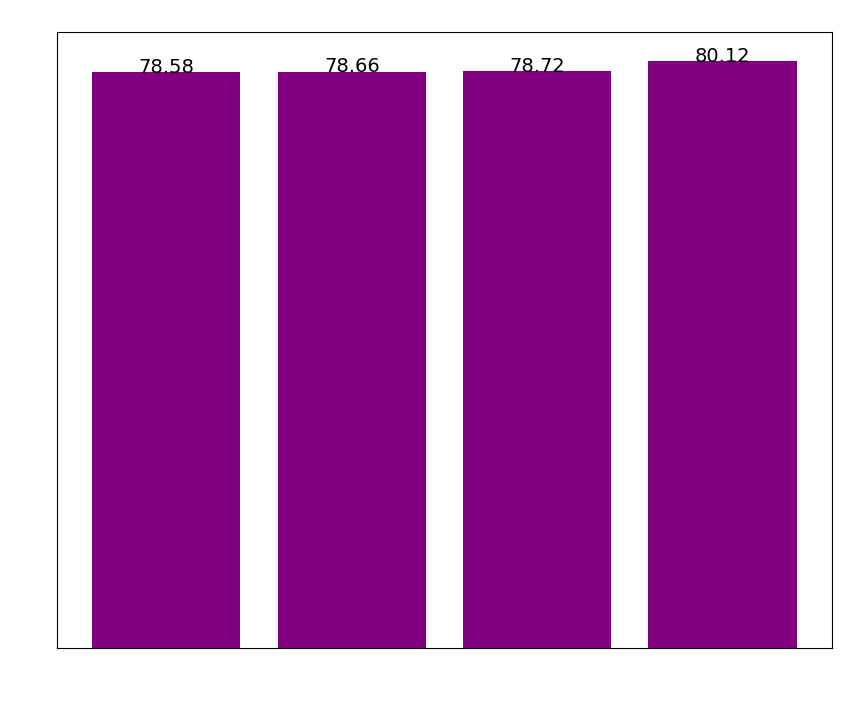

In [32]:
# Define the data
parameters = ['1', '10', '100', '1000']
accuracies = best_accuracy_smoothing

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 8)) 
bars = ax.bar(parameters, accuracies, color='purple')

# Set label and tick color to white
ax.tick_params(colors='white')
ax.set_title('Smoothing Parameters Comparison', color='white')
ax.set_ylabel('Accuracy', color='white')
ax.set_xlabel('Smoothing Parameters', color='white')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.25, yval, yval, fontsize=14, color='black')

# Show the plot
plt.show()

<h2> Logistic Regression </h2>

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [34]:
df_log = pd.get_dummies(df, columns=['workclass', 'fnlwgt', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country'])

X_log = df_log.drop("income", axis=1)
Y_log = df_log["income"]

X_train_log, X_test_log, Y_train_log, Y_test_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)
X_train_log

age  education_num  capital_gain  capital_loss  workclass_ Federal-gov  \
32239   36              9             0             0                       0   
30377   52              9          3325             0                       0   
5457    34             10             0             0                       0   
19700   54              9             0             0                       0   
23197   30              9             0             0                       0   
...    ...            ...           ...           ...                     ...   
29823   38             15             0             0                       0   
5392    63             13             0             0                       0   
860     18              7             0             0                       0   
15801   34             11             0             0                       0   
23669   23             10             0             0                       0   

       workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
32239                     0                        0                   1   
30377                     0                        0                   1   
5457                      0                        0                   1   
19700                     0                        0                   1   
23197                     0                        0                   1   
...                     ...                      ...                 ...   
29823                     0                        0                   1   
5392                      0                        0                   1   
860                       0                        0                   1   
15801                     0                        0                   1   
23669                     0                        0                   1   

       workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
32239                        0                            0  ...   
30377                        0                            0  ...   
5457                         0                            0  ...   
19700                        0                            0  ...   
23197                        0                            0  ...   
...                        ...                          ...  ...   
29823                        0                            0  ...   
5392                         0                            0  ...   
860                          0                            0  ...   
15801                        0                            0  ...   
23669                        0                            0  ...   

       native_country_ Portugal  native_country_ Puerto-Rico  \
32239                         0                            0   
30377                         0                            0   
5457                          0                            0   
19700                         0                            0   
23197                         0                            0   
...                         ...                          ...   
29823                         0                            0   
5392                          0                            0   
860                           0                            0   
15801                         0                            0   
23669                         0                            0   

       native_country_ Scotland  native_country_ South  \
32239                         0                      0   
30377                         0                      0   
5457                          0                      0   
19700                         0                      0   
23197                         0                      0   
...                         ...                    ...   
29823                         0                      0   
5392                          0                      0   
860          

In [35]:
Y_train = []
for i in Y_train_log:
    if(i == " <=50K"):
        Y_train.append(0)
    else:
        Y_train.append(1)
        
Y_test = []
for i in Y_test_log:
    if(i == " <=50K"):
        Y_test.append(0)
    else:
        Y_test.append(1)

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train_log, Y_train)
Y_pred_log = logreg.predict(X_test_log)

# Evaluate the model using various metrics
accuracy_log = round(accuracy_score(Y_test, Y_pred_log)*100,2)
print("Accuracy:", accuracy_log)
print("Precision:", round(precision_score(Y_test, Y_pred_log)*100),2)
print("Recall:", round(recall_score(Y_test, Y_pred_log)*100),2)
print("F1 Score:", round(f1_score(Y_test, Y_pred_log)*100),2)

C:\Users\mufad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 84.22
Precision: 73 2
Recall: 57 2
F1 Score: 64 2


<h2> K-Nearest Neighbors </h2>

In [37]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

X_train_knn = X_train_log
X_test_knn = X_test_log

In [38]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_knn, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
y_pred_knn = knn.predict(X_test_knn)

accuracy_knn = round(accuracy_score(Y_test, y_pred_knn)*100,2)
print("Accuracy:", accuracy_knn)
print("Precision:", round(precision_score(Y_test, y_pred_knn)*100),2)
print("Recall:", round(recall_score(Y_test, y_pred_knn)*100),2)
print("F1 Score:", round(f1_score(Y_test, y_pred_knn)*100),2)

Accuracy: 84.45
Precision: 69 2
Recall: 67 2
F1 Score: 68 2


<h3> Comparing All Models </h3>

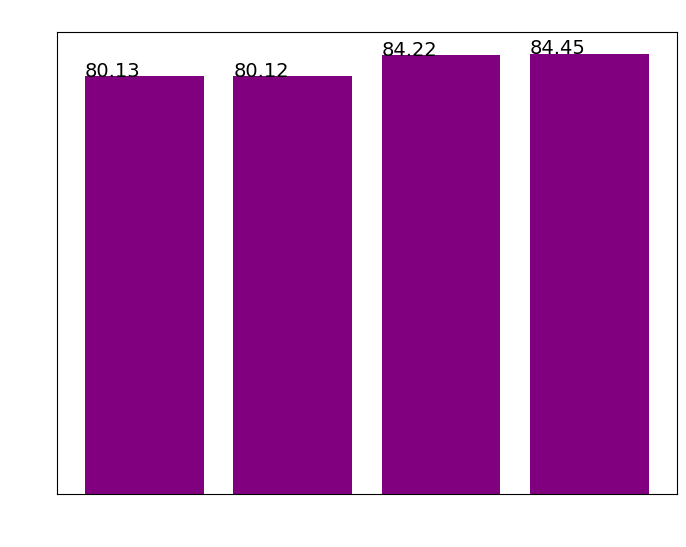

In [41]:
# Define the data
models = ['Naive Bayes', 'Laplace Smoothing', 'Logistic', 'KNN']
accuracies = [best_accuracy, max(best_accuracy_smoothing), accuracy_log, accuracy_knn]

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models, accuracies, color='purple')

# Set label and tick color to white
ax.tick_params(colors='white')
ax.set_title('Model Comparison', color='white')
ax.set_ylabel('Accuracy', color='white')
ax.set_xlabel('Models', color='white')

# Add labels to bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval, yval, fontsize=14, color='black')

# Show the plot
plt.show()